# Import

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from scipy import stats

import pathlib

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Read Data

In [2]:
qm9 = pd.read_csv("qm_ext_plus.csv")
qm9.index = qm9["Unnamed: 0"]
qm9.drop(columns=["Unnamed: 0"], inplace=True)
qm9["mol"] = qm9["smiles"].apply(Chem.MolFromSmiles)

In [3]:
qm9.dropna()

,smiles,mu,alpha,homo,lumo,gap,zpve,cv,u0,u298,h298,g298,num_atoms,mol
Unnamed: 0,,,,,,,,,,,,,,
0,C,0.0000,13.210000,-0.387700,0.117100,0.504800,0.044749,6.469,-40.478930,-40.476062,-40.475117,-40.498597,1,<rdkit.Chem.rdchem.Mol object at 0x7ff6d984a140>
1,N,1.6256,9.460000,-0.257000,0.082900,0.339900,0.034358,6.316,-56.525887,-56.523026,-56.522082,-56.544961,1,<rdkit.Chem.rdchem.Mol object at 0x7ff6d984a560>
2,O,1.8511,6.310000,-0.292800,0.068700,0.361500,0.021375,6.002,-76.404702,-76.401867,-76.400922,-76.422349,1,<rdkit.Chem.rdchem.Mol object at 0x7ff6d984a020>
3,C#C,0.0000,16.280000,-0.284500,0.050600,0.335100,0.026841,8.574,-77.308427,-77.305527,-77.304583,-77.327429,2,<rdkit.Chem.rdchem.Mol object at 0x7ff6d984a740>
4,C#N,2.8937,12.990000,-0.360400,0.019100,0.379600,0.016601,6.278,-93.411888,-93.409370,-93.408425,-93.431246,2,<rdkit.Chem.rdchem.Mol object at 0x7ff6d984a680>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155584,CCCCCC(Cl)(Cl)Cl,1.6998,91.438949,-0.437290,0.151861,0.589151,0.160407,39.627,-1612.899018,-1615.123029,-1612.726294,-1612.777780,9,<rdkit.Chem.rdchem.Mol object at 0x7ff6d7e1e860>
155585,CCCNCC(Cl)(Cl)Cl,1.0758,88.241518,-0.375428,0.153217,0.528645,0.149152,39.102,-1628.886186,-1631.151460,-1628.724865,-1628.775694,9,<rdkit.Chem.rdchem.Mol object at 0x7ff6d7e1e8c0>
155586,CCCOCC(Cl)(Cl)Cl,5.6070,83.982178,-0.429966,0.153852,0.583818,0.136714,37.858,-1648.698216,-1651.009167,-1648.549519,-1648.600105,9,<rdkit.Chem.rdchem.Mol object at 0x7ff6d7e1e920>


In [4]:
db_conf = pd.read_parquet("db_conf.parquet")
db_conf.index = db_conf["db_idx"]
db_conf.drop(columns=["Unnamed: 0", "db_idx"], inplace=True)
db_conf["mol"] = db_conf["smiles"].apply(Chem.MolFromSmiles)
# db_conf.drop(columns=["CONF", "CONFCl", "CONFClBr", "CONFClBrI"], inplace=True)
db_conf = db_conf.reset_index(drop=True)

In [5]:
na_ind = db_conf[db_conf.iloc[:,4:-1].isna().all(axis=1)].index

In [6]:
db_conf = db_conf.drop(index=na_ind)
db_conf = db_conf.reset_index(drop=True)

# Labels Encoding

In [7]:
from sklearn import preprocessing

In [8]:
le = preprocessing.LabelEncoder()
le.fit(["nB", "B"])
db_conf["class_encoded"] = le.transform(db_conf["Experimental BCF class"])

In [9]:
db_conf["class_encoded"] = db_conf["class_encoded"].replace({1:0, 0:1})

In [10]:
db_conf

,smiles,Experimental logarithmic BCF,Experimental BCF class,FQD_2,FQD_3,FQD_4,FQD_5,FQD_6,FQD_7,FQD_8,FQD_9,mol,class_encoded
0,CNc1cccc(C)c1,0.849,nB,[6],None,None,None,[213],"[929, 939]","[4340, 5388]",[32107],<rdkit.Chem.rdchem.Mol object at 0x7ff6d5136e60>,0
1,CC(COc1ccc(Oc2ccccc2)cc1)Oc1ccccn1,3.140,B,"[6, 7]","[12, 13, 14]","[21, 39, 40, 41]","[81, 84, 134, 136]","[213, 214, 277, 395, 548]","[948, 953, 1578]","[4590, 5397, 5402]","[31844, 33001, 33006]",<rdkit.Chem.rdchem.Mol object at 0x7ff6d5137460>,1
2,CCCCCCCC/C=C\CCCCCCCCCCCCC,1.176,nB,[6],[12],[38],[132],[542],[2719],[14787],[123245],<rdkit.Chem.rdchem.Mol object at 0x7ff6d4d3f760>,0
3,Clc1ccccc1Cl,2.500,nB,None,None,None,None,[213],[134076],[135441],None,<rdkit.Chem.rdchem.Mol object at 0x7ff6d4d3f640>,0
4,Nc1cccc([N+](=O)[O-])c1,0.522,nB,None,None,None,None,[213],[939],[4360],[131914],<rdkit.Chem.rdchem.Mol object at 0x7ff6d4d3f5e0>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,CC1=C(C)S(=O)(=O)CCS1(=O)=O,0.633,nB,[6],None,None,None,"[133896, 133900]","[134043, 134044, 134066, 134068]","[135086, 135404, 135405]",[145115],<rdkit.Chem.rdchem.Mol object at 0x7ff6d93b3ca0>,0
835,FC(F)(F)c1ccc(Cl)c(Cl)c1,3.176,B,[6],None,None,None,[213],"[929, 134076]","[134378, 134382, 135441]",[137748],<rdkit.Chem.rdchem.Mol object at 0x7ff6d93b3d00>,1
836,CN(C)[C@@H]1C(=O)C(C(=N)O)=C(O)[C@@]2(O)C(=O)C...,-0.222,nB,"[5, 6, 7]","[10, 12, 13]","[17, 20, 21, 34, 37, 38, 39, 41]","[54, 67, 68, 70, 71, 80, 81, 82, 83, 127, 131,...","[213, 224, 226, 228, 254, 258, 259, 260, 271, ...","[929, 948, 1092, 1094, 1099, 1104, 1119, 1129,...","[4341, 4957, 4959, 5378, 5407, 5809, 5841, 584...","[26263, 26273, 28867, 32083, 32170, 32193, 322...",<rdkit.Chem.rdchem.Mol object at 0x7ff6d93b3d60>,0
837,CC(C)N(C(=O)CCl)c1ccccc1,1.568,nB,"[5, 6]","[10, 11, 12]","[18, 35]","[69, 73, 128]","[213, 255, 262, 288, 386]","[939, 1121, 1626, 1677]","[5388, 7443]","[25503, 26283, 32992]",<rdkit.Chem.rdchem.Mol object at 0x7ff6d93b3dc0>,0


In [11]:
db_conf["mol"] = db_conf["smiles"].apply(Chem.MolFromSmiles)
db_conf["num_atoms"] = db_conf["mol"].apply(lambda x: x.GetNumAtoms())

db_conf_filled = db_conf.copy()

# Calculate FQDs

In [12]:
qprops = "mu,alpha,homo,lumo,gap,zpve,u0,u298,h298,g298,cv".split(",")

In [13]:
import statistics
def calculate_FQDs(indices, patterns_db, quantum_property):
    if isinstance(indices, int) and indices == 0:
        return np.NaN
    if indices is None:
        return np.NaN
    ret = []
    for i in indices:
        ret.append(patterns_db[quantum_property][i])
    return statistics.mean(ret)

def calculate_FQDs_quant(mol, indices, patterns_db, quantum_property):
    if isinstance(indices, int) and indices == 0:
        return np.NaN
    if indices is None:
        return np.NaN
    ret = []
    for i in indices:
        n_occurences = len(list(mol.GetSubstructMatch(patterns_db["mol"][i])))
        ret.append(patterns_db[quantum_property][i] * n_occurences)
    return statistics.mean(ret)

In [14]:
# # # for prop in "A,B,C,mu,alpha,homo,lumo,gap,zpve,u0,u298,h298,g298,cv".split(","):
# for prop in qprops:
#     for num in range(2, 10):
#         db_conf_filled[f"FQD_{num}_{prop}"] = db_conf_filled[f"FQD_{num}"].apply(calculate_FQDs, patterns_db=qm9, quantum_property=prop)

In [15]:
# for prop in qprops:
#     for num in range(2, 10):
#         db_conf_filled[f"FQD_{num}_{prop}_per_atom"] = db_conf_filled[f"FQD_{num}_{prop}"] / db_conf_filled["num_atoms"]

# Quant FQDs

In [16]:
for prop in qprops:
    for num in range(2, 10):
        db_conf_filled[f"quant_FQD_{num}_{prop}"] = db_conf_filled["mol"].apply(lambda x: calculate_FQDs_quant(x,
                                                                          indices=db_conf_filled[db_conf_filled["mol"]==x][f"FQD_{num}"].iloc[0],
                                                                          patterns_db=qm9,
                                                                          quantum_property=prop)
                                                                         )

In [17]:
for prop in qprops:
    for num in range(2, 10):
        db_conf_filled[f"quant_FQD_{num}_{prop}_per_atom"] = db_conf_filled[f"quant_FQD_{num}_{prop}"] / db_conf_filled["num_atoms"]

In [18]:
import itertools
fqd_cols_qual = []
for num, prop in itertools.product(range(2,10), qprops):
    fqd_cols_qual.append(f"FQD_{num}_{prop}")
fqd_cols_qual_per_atom = [f"{x}_per_atom" for x in fqd_cols_qual]
quant_fqd_cols = [f"quant_{x}" for x in fqd_cols_qual]
quant_fqd_cols_per_atom = [f"quant_{x}" for x in fqd_cols_qual_per_atom]

In [19]:
db_conf_filled.columns[14:]

Index(['quant_FQD_2_mu', 'quant_FQD_3_mu', 'quant_FQD_4_mu', 'quant_FQD_5_mu',
       'quant_FQD_6_mu', 'quant_FQD_7_mu', 'quant_FQD_8_mu', 'quant_FQD_9_mu',
       'quant_FQD_2_alpha', 'quant_FQD_3_alpha',
       ...
       'quant_FQD_8_g298_per_atom', 'quant_FQD_9_g298_per_atom',
       'quant_FQD_2_cv_per_atom', 'quant_FQD_3_cv_per_atom',
       'quant_FQD_4_cv_per_atom', 'quant_FQD_5_cv_per_atom',
       'quant_FQD_6_cv_per_atom', 'quant_FQD_7_cv_per_atom',
       'quant_FQD_8_cv_per_atom', 'quant_FQD_9_cv_per_atom'],
      dtype='object', length=176)

In [20]:
cols = db_conf_filled.columns[14:]

# Fill with zeros

In [21]:
nan_cols = db_conf.iloc[:,4:12].isna()

In [22]:
x = db_conf_filled[cols].fillna(0)
y = db_conf_filled["class_encoded"]

In [23]:
nan_cols_colnames = [f"{x}_nan" for x in nan_cols]
nan_cols.columns = nan_cols_colnames
nan_cols

,FQD_3_nan,FQD_4_nan,FQD_5_nan,FQD_6_nan,FQD_7_nan,FQD_8_nan,FQD_9_nan,mol_nan
0,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,True,False
4,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
834,True,True,True,False,False,False,False,False
835,True,True,True,False,False,False,False,False
836,False,False,False,False,False,False,False,False
837,False,False,False,False,False,False,False,False


In [24]:
x = pd.concat([x, nan_cols], axis=1)
x

,quant_FQD_2_mu,quant_FQD_3_mu,quant_FQD_4_mu,quant_FQD_5_mu,quant_FQD_6_mu,quant_FQD_7_mu,quant_FQD_8_mu,quant_FQD_9_mu,quant_FQD_2_alpha,quant_FQD_3_alpha,...,quant_FQD_8_cv_per_atom,quant_FQD_9_cv_per_atom,FQD_3_nan,FQD_4_nan,FQD_5_nan,FQD_6_nan,FQD_7_nan,FQD_8_nan,FQD_9_nan,mol_nan
0,0.000000,0.0000,0.00000,0.000000,0.000000,6.848800,13.020800,14.40630,47.900000,0.00,...,25.429333,34.071000,True,True,True,False,False,False,False,False
1,1.525800,2.6230,3.80990,8.173250,7.871760,5.880933,4.931733,12.29910,40.920000,90.75,...,8.696556,11.601875,False,False,False,False,False,False,False,False
2,0.000000,0.1791,0.00000,0.301500,0.000000,0.422100,0.000000,0.54180,47.900000,104.25,...,13.616348,17.217000,False,False,False,False,False,False,False,False
3,0.000000,0.0000,0.00000,0.000000,0.000000,-0.000700,-21.363200,0.00000,0.000000,0.00,...,24.767000,0.000000,True,True,True,False,False,False,True,False
4,0.000000,0.0000,0.00000,0.000000,0.000000,11.422600,9.324000,39.49380,0.000000,0.00,...,23.248000,23.053500,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,0.000000,0.0000,0.00000,0.000000,-3.479100,-10.527475,-11.717333,16.39350,47.900000,0.00,...,23.407333,30.375750,True,True,True,False,False,False,False,False
835,0.000000,0.0000,0.00000,0.000000,0.000000,1.137150,-18.736800,-27.43740,47.900000,0.00,...,16.680667,21.668250,True,True,True,False,False,False,False,False
836,2.423133,4.0410,5.00385,9.239357,9.384406,12.560830,15.701759,18.30079,36.733333,87.73,...,8.633506,10.959239,False,False,False,False,False,False,False,False
837,2.108900,6.3565,14.68760,18.250833,17.415000,21.800975,20.810000,21.11280,38.130000,81.43,...,18.348571,20.109643,False,False,False,False,False,False,False,False


# OOB dataset creation

In [25]:
oob_idx = np.loadtxt("oob_idx").astype(int)
train_idx = np.loadtxt("train_idx").astype(int)

In [26]:
res_x, res_y = x.loc[list(train_idx.astype(int))], y.loc[list(train_idx.astype(int))]

In [27]:
oob_x, oob_y = x.loc[list(oob_idx)], y.loc[list(oob_idx)]

In [28]:
x, y = res_x, res_y

In [29]:
y.value_counts()

0    409
1    117
Name: class_encoded, dtype: int64

# Hyperparameters tuning with GridSearchCV

# Pipeline creation

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler

In [34]:
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [35]:
from sklearn.model_selection import StratifiedKFold

def my_score(model, n_folds, scoring_callable, X, Y):
    scores = []
    cv = StratifiedKFold(n_folds)
    oversampler = RandomOverSampler(random_state=1)
    preprocessor = ColumnTransformer(
    [("prep", Pipeline([
        ("scaler", StandardScaler()),
    ]),
                                 cols)], remainder="passthrough")

    for train_index, validation_index in cv.split(X, Y):
        x, y = X.iloc[train_index], Y.iloc[train_index]
        xx, yy = oversampler.fit_resample(x, y)
        xx = preprocessor.fit_transform(xx)
        model.fit(xx, yy)
        x_val = X.iloc[validation_index]
        x_val = preprocessor.transform(x_val)
        score = scoring_callable(Y.iloc[validation_index], model.predict(x_val))
        scores.append(score)
    
    return np.array(scores).mean()

In [36]:
""""lgb__max_depth": range(3, 12),
"lgb__n_estimators": [200, 350, 500, 1000],
"lgb__learning_rate": [0.01, 0.05, 0.1, 0.15],
"lgb__reg_alpha": range(0, 15),
"lgb__reg_lambda": range(0,15)"""

import itertools
params = list(itertools.product(range(3, 12),
        [200, 350, 500, 1000],
        [0.01, 0.05, 0.1, 0.15],
        range(0, 15),
        range(0,15)))
result = pd.DataFrame(params)
result.columns = "max_depth,n_estimators,learning_rate,reg_alpha,reg_lambda".split(",")


In [31]:
scores = []
for max_depth, n_estimators, learning_rate, reg_alpha, reg_lambda in params:
    model = lgb.LGBMClassifier(
        max_depth=max_depth,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        random_state=1
        )
    scores.append(my_score(model, 5, f1_score, x, y))

result["f_score"] = scores

KeyboardInterrupt: 

In [47]:
result.to_csv("hyperparams_fqd_zeros_results.csv")
# result = pd.read_csv("hyperparams_fqd_zeros_results.csv")

In [50]:
result[result["f_score"]==result["f_score"].max()]

,Unnamed: 0,max_depth,n_estimators,learning_rate,reg_alpha,reg_lambda,f_score
4784,4784,4,350,0.05,3,14,0.642843


# OOB test

## Scale and apply PCA to training dataset

In [51]:
oversampler = RandomOverSampler(random_state=1)
preprocessor = ColumnTransformer(
    [("prep", Pipeline([
        ("scaler", StandardScaler()),
    ]),
                                 cols)], remainder="passthrough")

oob_scores = []
bal_acc_scores = []
preds = []
xx, yy = oversampler.fit_resample(x, y)
xx = preprocessor.fit_transform(xx)
for i in range(5):
    model = lgb.LGBMClassifier(
        max_depth=4,
        n_estimators=350,
        learning_rate=0.05,
        reg_alpha=3,
        reg_lambda=14,
        random_state=60+i
        )
    model.fit(xx, yy)
    x_val = oob_x
    x_val = preprocessor.transform(x_val)
    pred = model.predict(x_val)
    score = f1_score(oob_y, pred)
    preds.append(pred)
    oob_scores.append(score)
    score = balanced_accuracy_score(oob_y, pred)
    bal_acc_scores.append(score)

In [52]:
oob_scores

[0.6197183098591549,
 0.6197183098591549,
 0.6197183098591549,
 0.6197183098591549,
 0.6197183098591549]

In [53]:
bal_acc_scores

[0.7594143502019481,
 0.7594143502019481,
 0.7594143502019481,
 0.7594143502019481,
 0.7594143502019481]

## LGBMC
With tuned hyperparameters

In [44]:
from sklearn.metrics import confusion_matrix
conf_mats = [confusion_matrix(le.inverse_transform(oob_y), le.inverse_transform(pred)) for pred in preds]
conf_mats

[array([[215,  29],
        [ 25,  44]]),
 array([[215,  29],
        [ 25,  44]]),
 array([[215,  29],
        [ 25,  44]]),
 array([[215,  29],
        [ 25,  44]]),
 array([[215,  29],
        [ 25,  44]])]

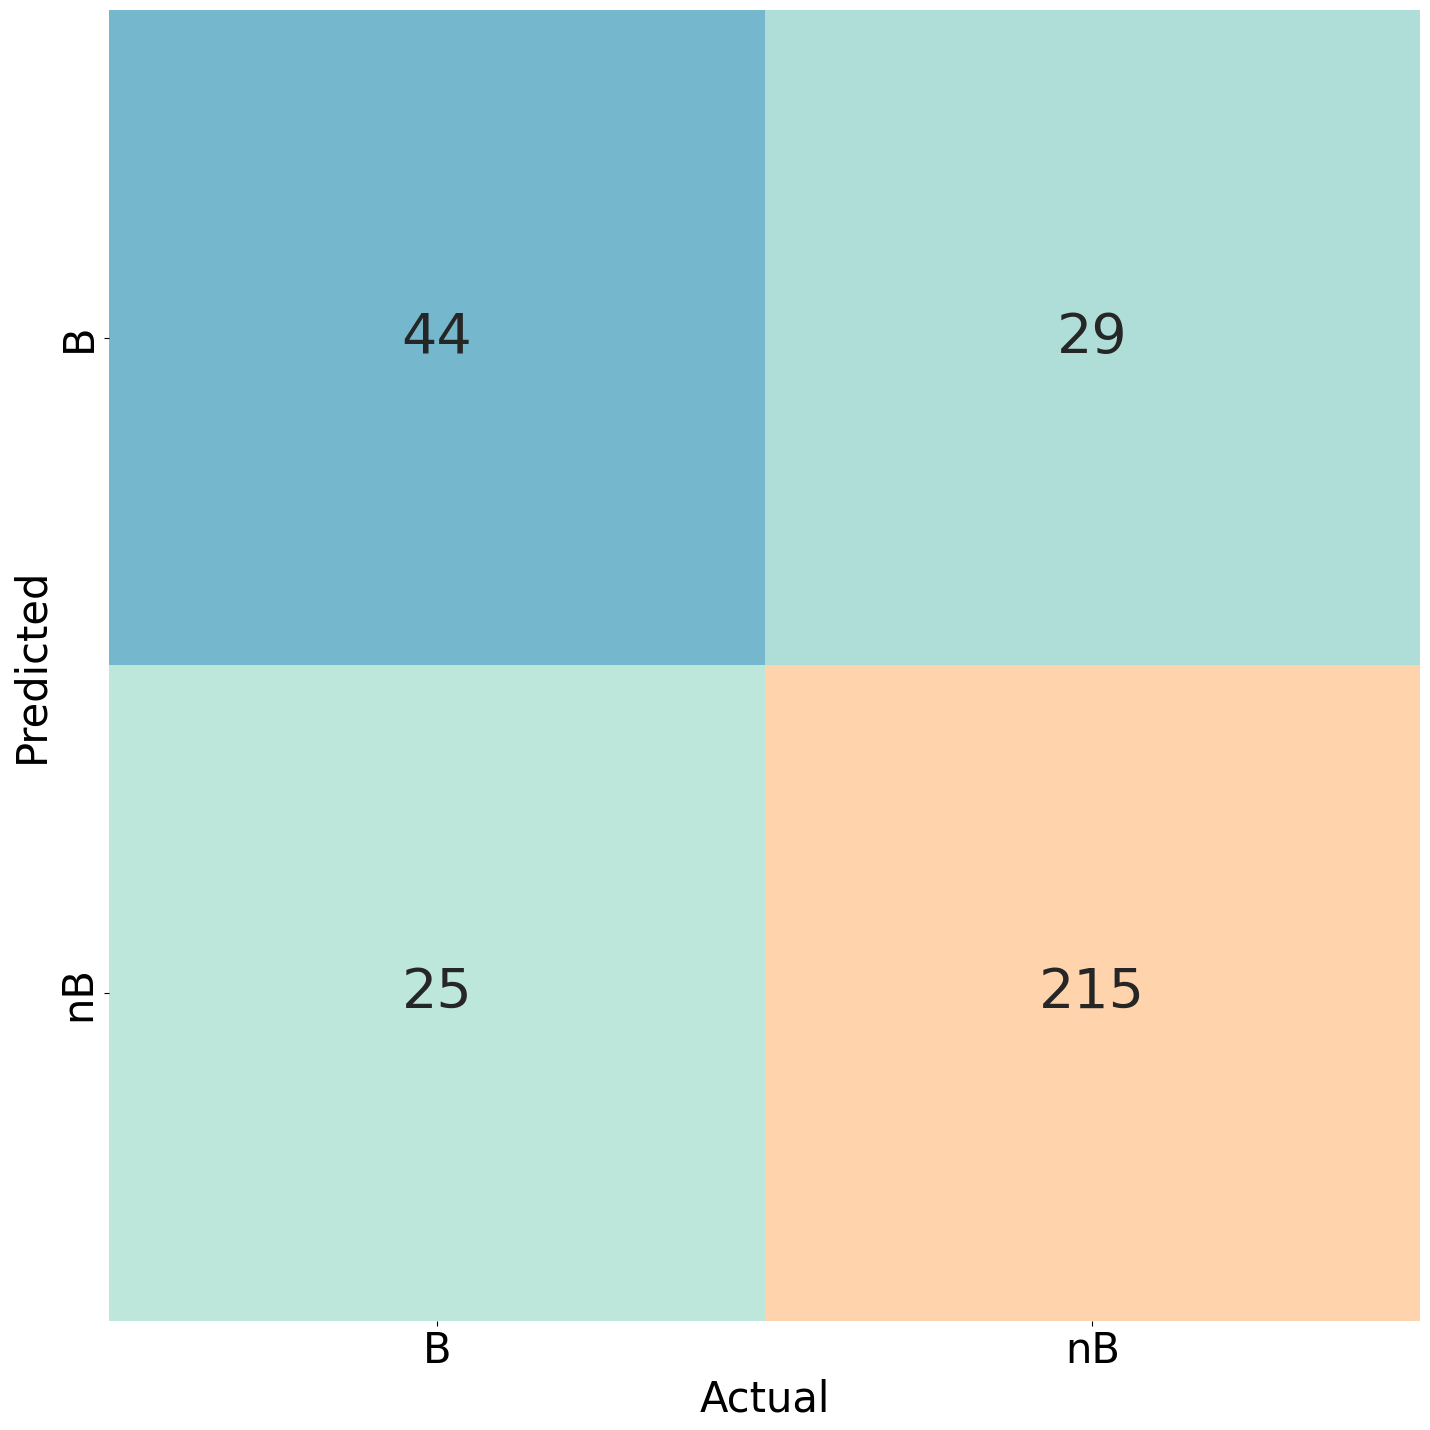

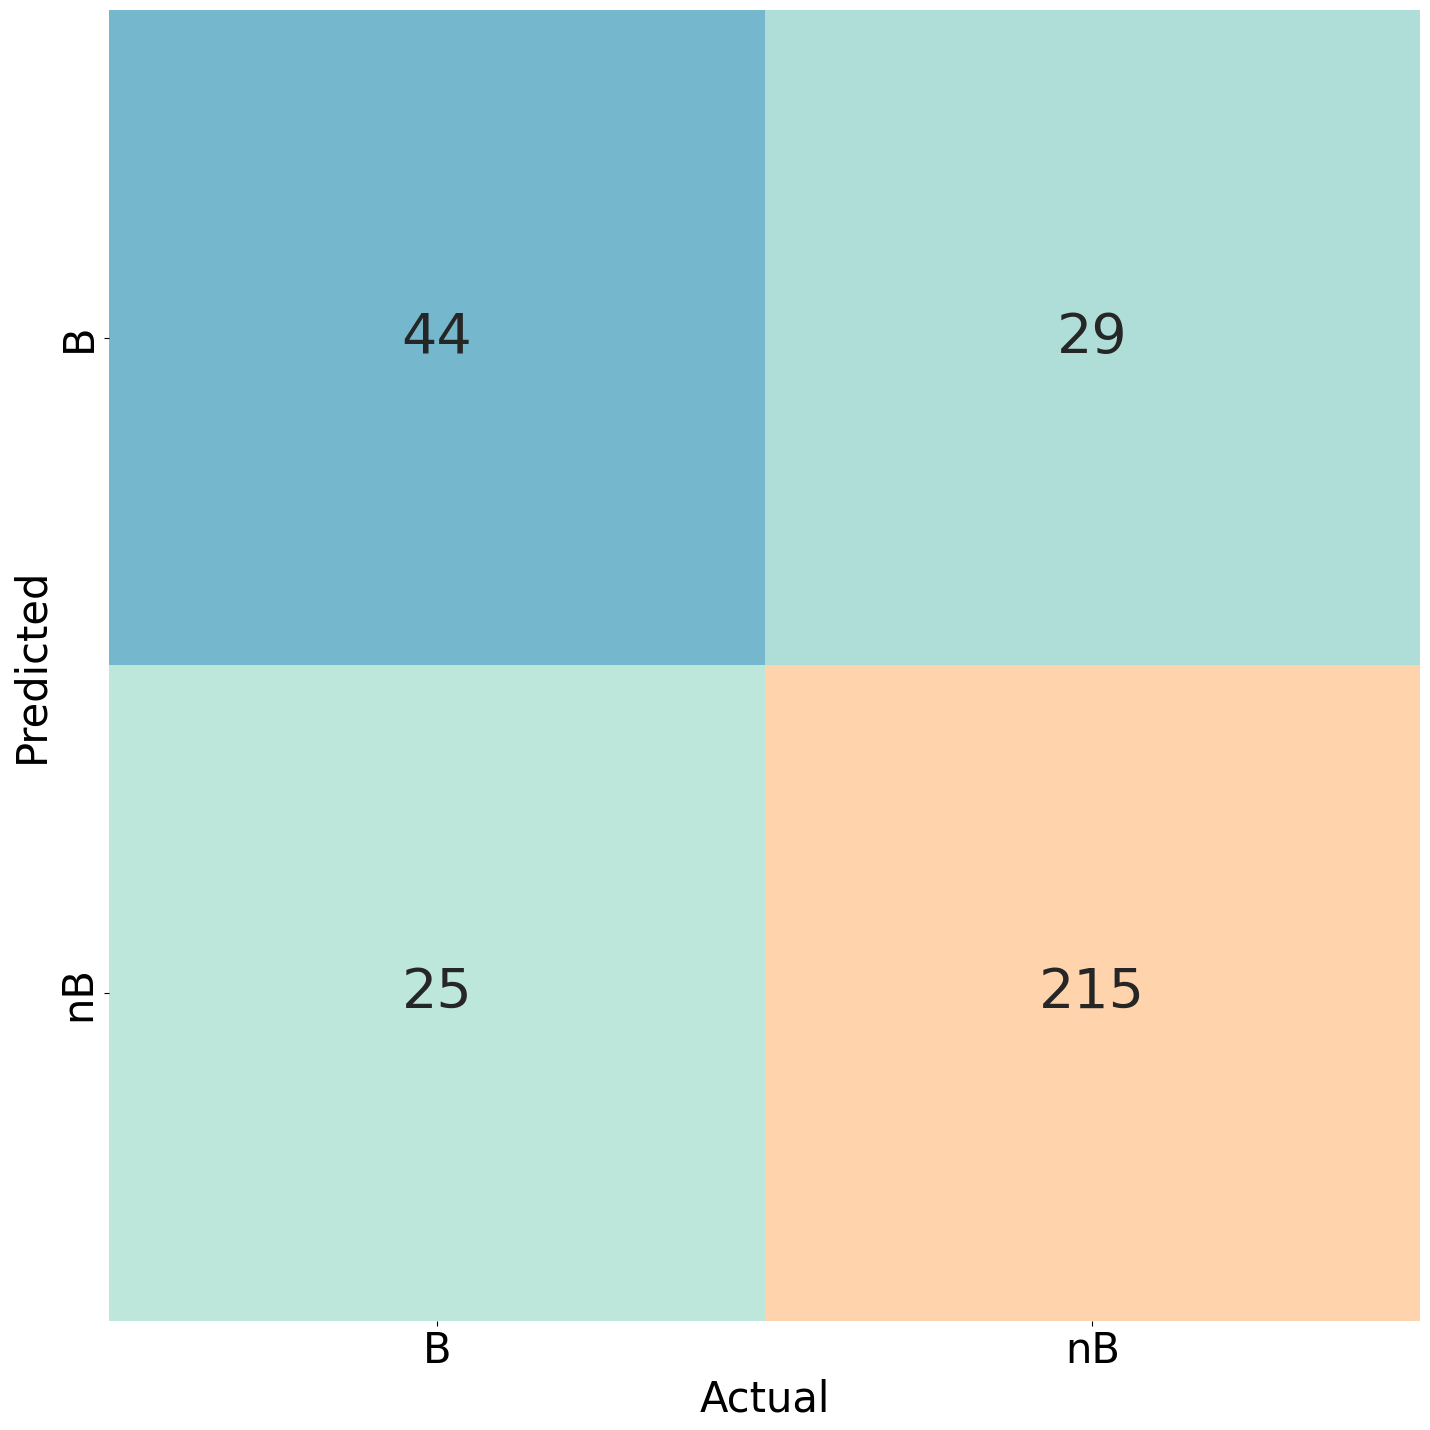

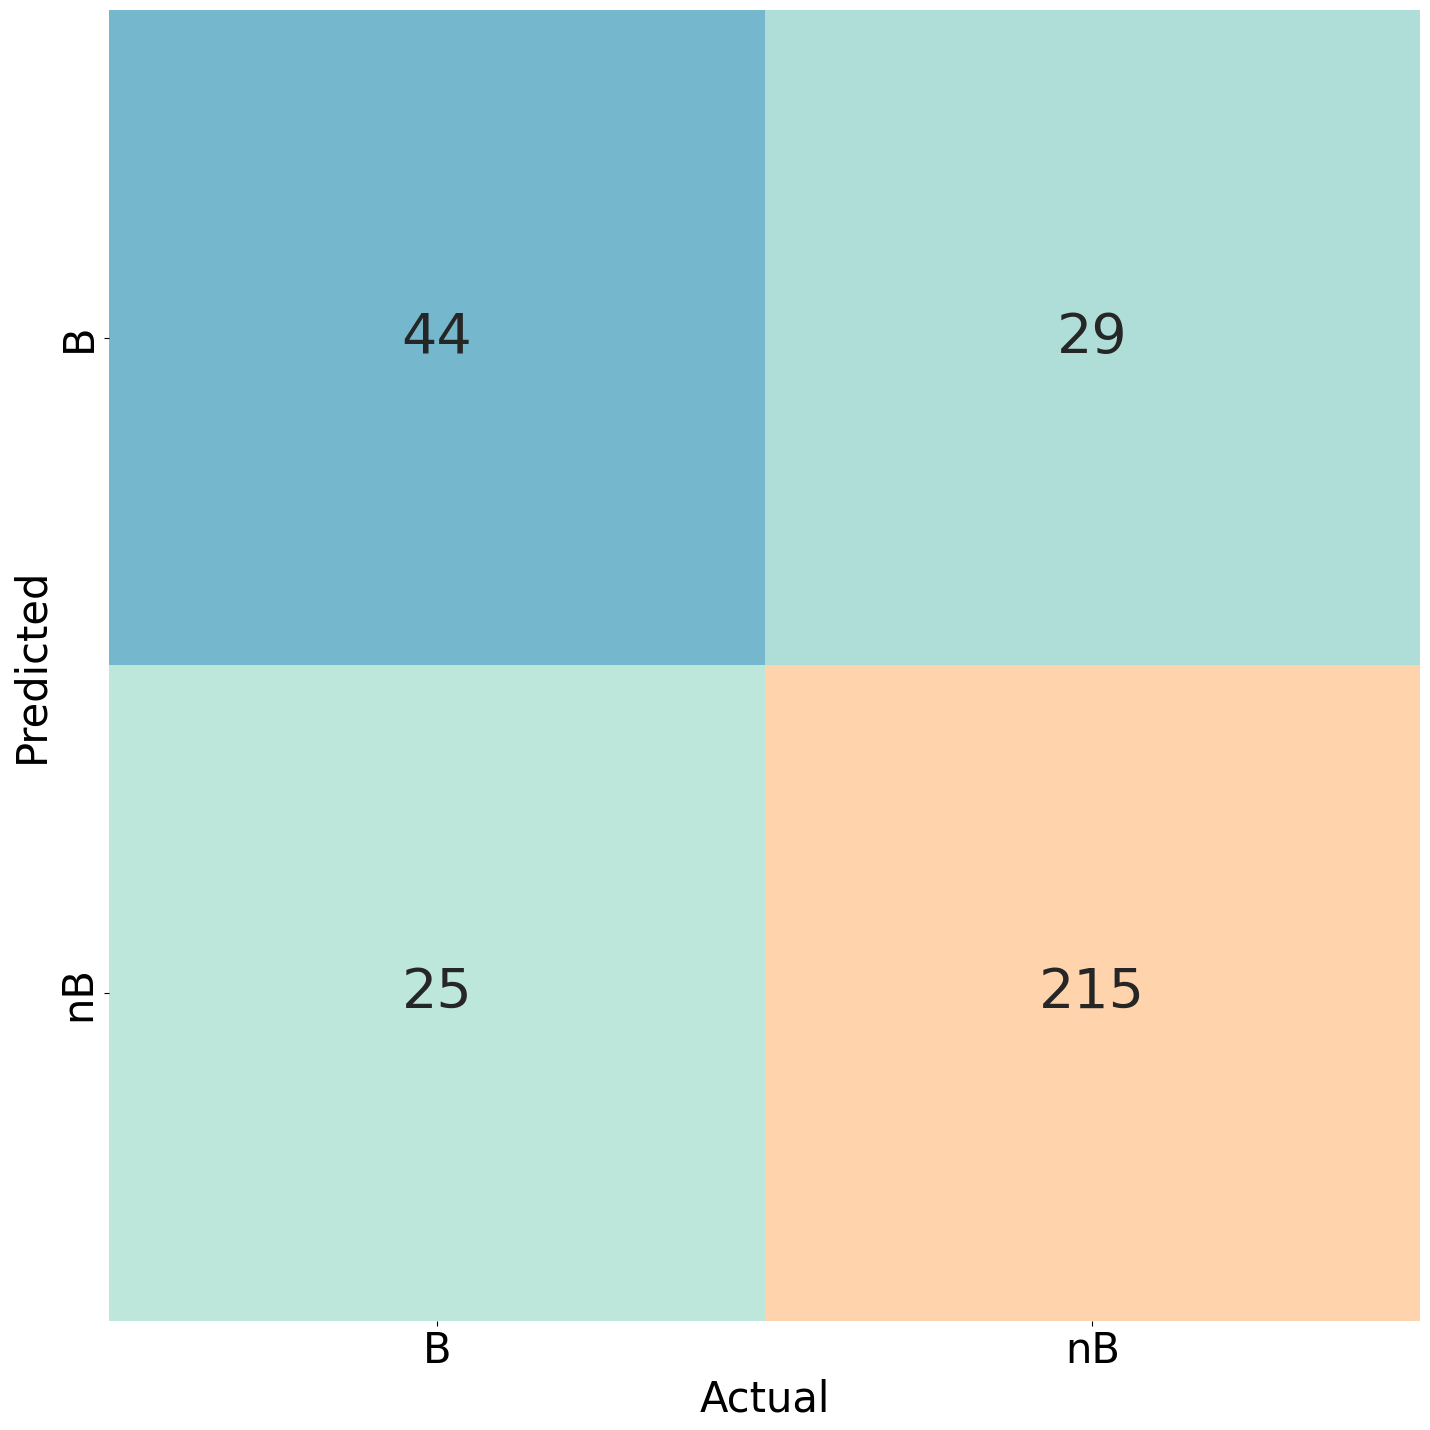

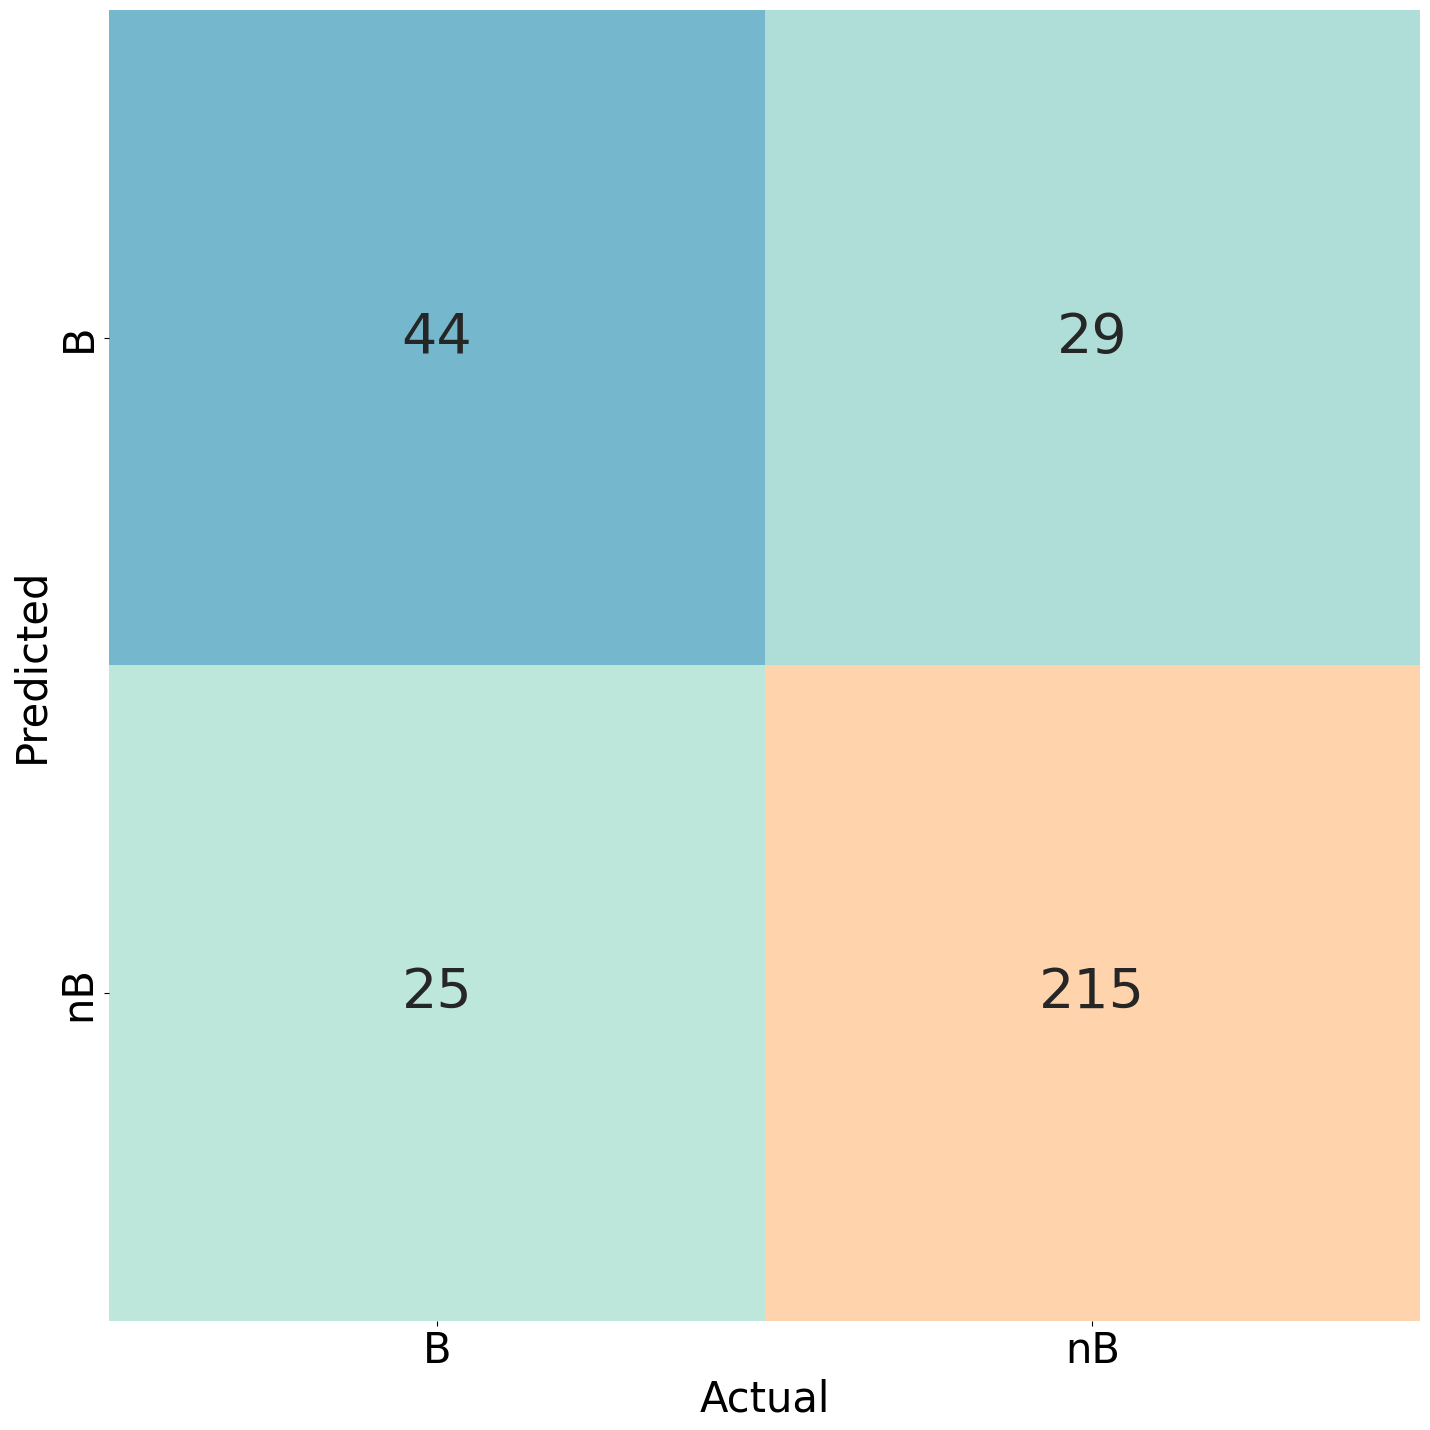

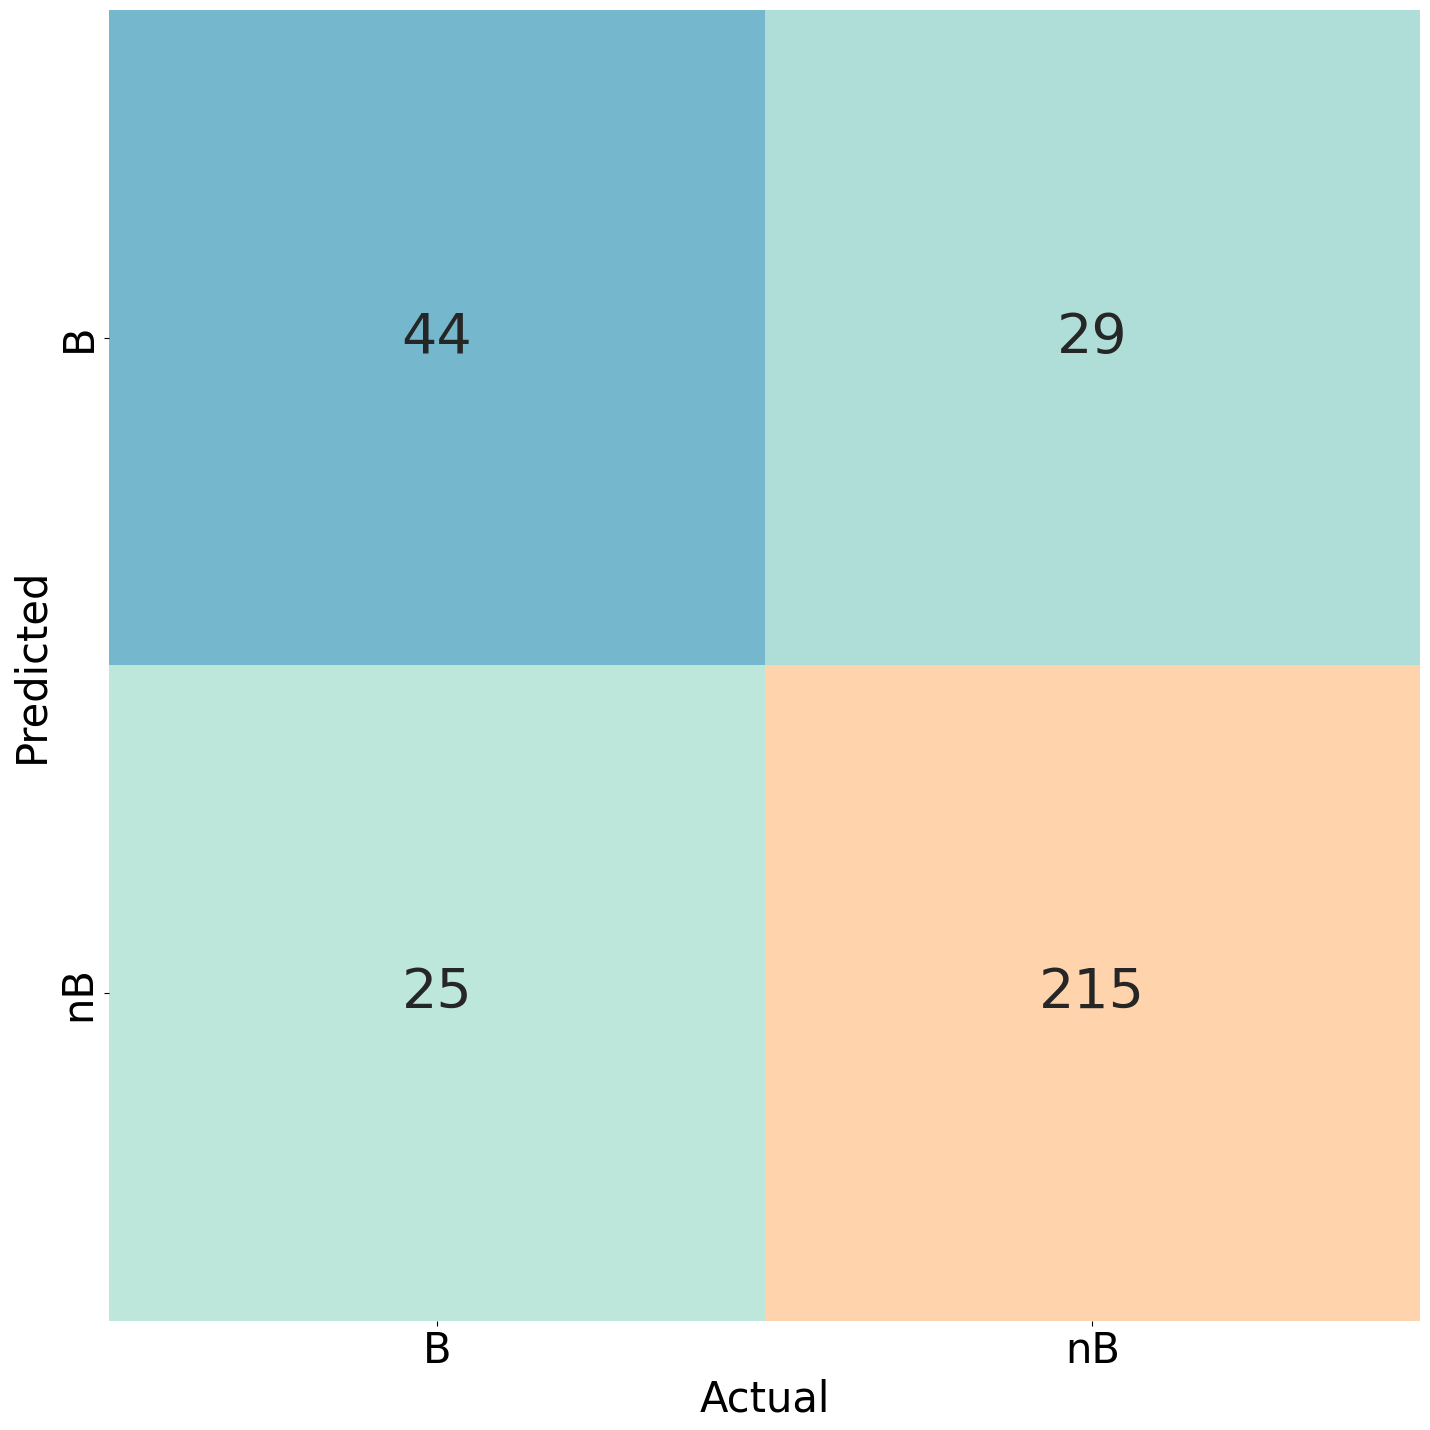

In [45]:
for conf_mat in conf_mats:
    rcParams["font.size"] = 30
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(
        conf_mat.ravel()[::-1].reshape((2,2)).T,
        annot=True,
        fmt=".3g",
        xticklabels=["B", "nB"],
        yticklabels=["B", "nB"],
        ax = ax,
        cbar = False,
        annot_kws={"fontsize": 40},
        cmap="icefire"
    )
    ax.set(
        ylabel="Predicted",
        xlabel="Actual"
    )
    plt.tight_layout()
    plt.show()

In [46]:
for conf_mat in conf_mats:
    tn, fp, fn, tp = conf_mat.ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp/(tp+fn)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    print("Specificity:", f"{specificity:.3}"," Sensitivity:", f"{sensitivity:.3}", "Accuracy", f"{accuracy:.3}", "Precision", f"{precision:.3}")


Specificity: 0.881  Sensitivity: 0.638 Accuracy 0.827 Precision 0.603
Specificity: 0.881  Sensitivity: 0.638 Accuracy 0.827 Precision 0.603
Specificity: 0.881  Sensitivity: 0.638 Accuracy 0.827 Precision 0.603
Specificity: 0.881  Sensitivity: 0.638 Accuracy 0.827 Precision 0.603
Specificity: 0.881  Sensitivity: 0.638 Accuracy 0.827 Precision 0.603
